In [2]:
# Necessary Libraries

import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Structure Initialization (Final)

# Function to create a 10x10 matrix with walls
def create_building():
    building = [[0 for _ in range(12)] for _ in range(12)]  # 12x12 to account for walls (nested list comprehension manner)
    for i in range(12):                                     # Chained Assignment
        building[i][0] = building[i][11] = 1                # Left and right walls
        building[0][i] = building[11][i] = 1                # Top and bottom walls
    return building

# Function to populate the building with people
def populate_building(building, num_people):
    max_x, max_y = len(building) - 1, len(building[0]) - 1  # Calculates max x and y coordinates within the building.
    particles = []  # List to store particle positions

    for _ in range(num_people):
        x, y = random.randint(0, max_x), random.randint(0, max_y)
        while building[x][y] == 1:  # Make sure not to place a person on a wall
            x, y = random.randint(0, max_x), random.randint(0, max_y)
        building[x][y] = 2  # Representing a person
        particles.append((x, y))  # Add the particle's position to the list

    return particles                                # Return the list of particle positions                           

# Function to add 2 doors in the building
def add_doors(building):
    doors = random.sample([(2, 0), (9, 0)], 2)  # Left wall and right wall doors
    for door in doors:
        x, y = door
        building[x][y] = 0  # Replace wall with the door
        
# Create a building
building = create_building()

# Populate the building with people and get their positions
particle_positions = populate_building(building, num_people=50)  # Change the number of people as needed

# Add doors to the building
add_doors(building)

# Print the resulting building
for row in building:
    print(row)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 1]
[0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1]
[1, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 1]
[1, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 1]
[1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1]
[1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1]
[1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1]
[1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1]
[0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1]
[1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	
0.0000	0.0044	0.0085	0.0120	0.0146	0.0161	0.0163	0.0152	0.0127	0.0092	0.0048	0.0000	
0.0000	0.0085	0.0164	0.0232	0.0282	0.0311	0.0315	0.0293	0.0246	0.0177	0.0093	0.0000	
0.0000	0.0120	0.0232	0.0327	0.0398	0.0439	0.0445	0.0413	0.0347	0.0250	0.0131	0.0000	
0.0000	0.0146	0.0282	0.0398	0.0485	0.0535	0.0542	0.0504	0.0422	0.0304	0.0159	0.0000	
0.0000	0.0161	0.0311	0.0439	0.0535	0.0590	0.0597	0.0555	0.0466	0.0335	0.0176	0.0000	
0.0000	0.0163	0.0315	0.0445	0.0542	0.0597	0.0605	0.0562	0.0471	0.0340	0.0178	0.0000	
0.0000	0.0152	0.0293	0.0413	0.0504	0.0555	0.0562	0.0522	0.0438	0.0316	0.0165	0.0000	
0.0000	0.0127	0.0246	0.0347	0.0422	0.0466	0.0471	0.0438	0.0368	0.0265	0.0139	0.0000	
0.0000	0.0092	0.0177	0.0250	0.0304	0.0335	0.0340	0.0316	0.0265	0.0191	0.0100	0.0000	
0.0000	0.0048	0.0093	0.0131	0.0159	0.0176	0.0178	0.0165	0.0139	0.0100	0.0052	0.0000	
0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.

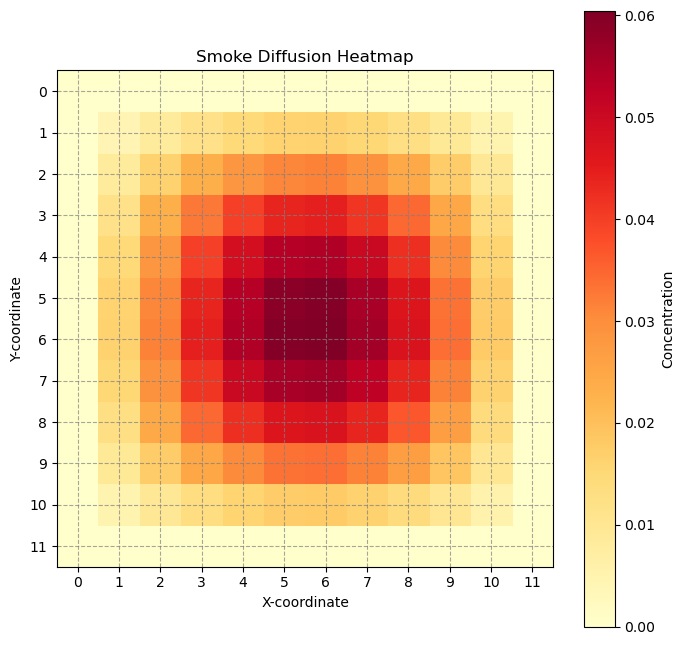

In [4]:
# Diffusion Smoke (Fixing) (Final)

# Parameters for diffusion simulation
D = 0.0000203  # Carbon Monoxide
delta_t = 1.0
delta_x = 0.01
num_steps = 50
matrix_size = 12

# Initialize the matrix for diffusion with zeros everywhere
C = np.zeros((matrix_size, matrix_size))

# Set a high concentration at the center
C[matrix_size // 2, matrix_size // 2] = 10.0

# Apply finite difference scheme for diffusion
for step in range(num_steps):
    new_C = np.copy(C)
    for i in range(1, matrix_size - 1):
        for j in range(1, matrix_size - 1):
            new_C[i, j] = C[i, j] + D * (delta_t / delta_x**2) * (
                C[i + 1, j] + C[i - 1, j] + C[i, j + 1] + C[i, j - 1] - 4 * C[i, j]
            )
    C = new_C

# Print the resulting concentration matrix
for i in range(matrix_size):
    for j in range(matrix_size):
        print(f'{C[i][j]:.4f}', end='\t')
    print()
    
# Create a heatmap
plt.figure(figsize=(8, 8))
plt.imshow(C, cmap='YlOrRd', interpolation='nearest', origin='upper')
plt.colorbar(label='Concentration')
plt.title('Smoke Diffusion Heatmap')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.xticks(range(matrix_size))
plt.yticks(range(matrix_size))
plt.grid(visible=True, linestyle='--', color='gray', alpha=0.7)

# Show the plot
plt.show()

0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	
0.0000	0.0044	0.0085	0.0120	0.0146	0.0161	0.0163	0.0152	0.0127	0.0092	0.0048	0.0000	
0.0000	0.0085	0.0164	0.0232	0.0282	0.0311	0.0315	0.0293	0.0246	0.0177	0.0093	0.0000	
0.0000	0.0120	0.0232	0.0327	0.0398	0.0439	0.0445	0.0413	0.0347	0.0250	0.0131	0.0000	
0.0000	0.0146	0.0282	0.0398	0.0485	0.0535	0.0542	0.0504	0.0422	0.0304	0.0159	0.0000	
0.0000	0.0161	0.0311	0.0439	0.0535	0.0590	0.0597	0.0555	0.0466	0.0335	0.0176	0.0000	
0.0000	0.0163	0.0315	0.0445	0.0542	0.0597	0.0605	0.0562	0.0471	0.0340	0.0178	0.0000	
0.0000	0.0152	0.0293	0.0413	0.0504	0.0555	0.0562	0.0522	0.0438	0.0316	0.0165	0.0000	
0.0000	0.0127	0.0246	0.0347	0.0422	0.0466	0.0471	0.0438	0.0368	0.0265	0.0139	0.0000	
0.0000	0.0092	0.0177	0.0250	0.0304	0.0335	0.0340	0.0316	0.0265	0.0191	0.0100	0.0000	
0.0000	0.0048	0.0093	0.0131	0.0159	0.0176	0.0178	0.0165	0.0139	0.0100	0.0052	0.0000	
0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.

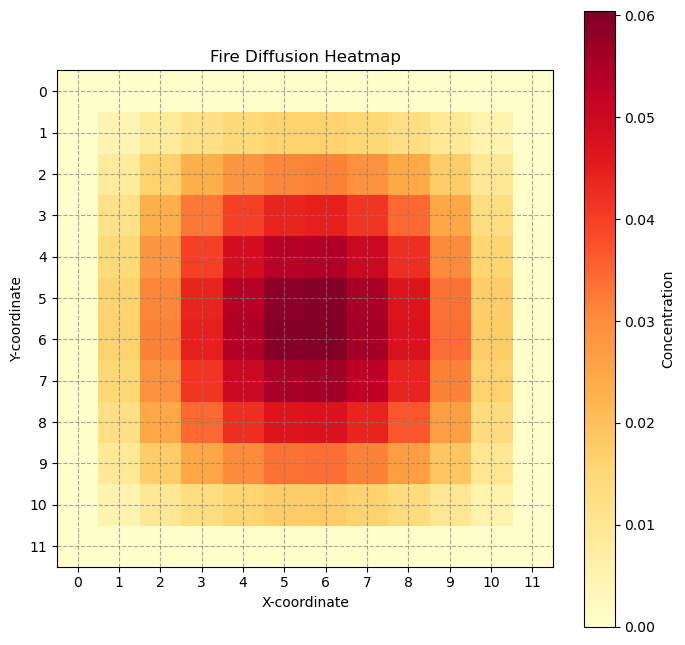

In [5]:
# Diffusion Fire (Fixing) (Final)

# Parameters for diffusion simulation
D = 0.0000203  # Carbon Monoxide
delta_t = 1.0
delta_x = 0.01
num_steps = 50
matrix_size = 12

# Initialize the matrix for diffusion with zeros everywhere
F = np.zeros((matrix_size, matrix_size))

# Set a high concentration at the center
F[matrix_size // 2, matrix_size // 2] = 10.0

# Apply finite difference scheme for diffusion
for step in range(num_steps):
    new_F = np.copy(F)  # Initialize new_F before the loop
    for i in range(1, matrix_size - 1):
        for j in range(1, matrix_size - 1):
            new_F[i, j] = F[i, j] + D * (delta_t / delta_x**2) * (
                F[i + 1, j] + F[i - 1, j] + F[i, j + 1] + F[i, j - 1] - 4 * F[i, j]
            )
    F = new_F

# Print the resulting concentration matrix
for i in range(matrix_size):
    for j in range(matrix_size):
        print(f'{F[i][j]:.4f}', end='\t')
    print()
    
# Create a heatmap
plt.figure(figsize=(8, 8))
plt.imshow(F, cmap='YlOrRd', interpolation='nearest', origin='upper')
plt.colorbar(label='Concentration')
plt.title('Fire Diffusion Heatmap')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.xticks(range(matrix_size))
plt.yticks(range(matrix_size))
plt.grid(visible=True, linestyle='--', color='gray', alpha=0.7)

# Show the plot
plt.show()

['0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000']
['0.000', '0.103', '0.069', '0.051', '0.041', '0.034', '0.029', '0.026', '0.023', '0.021', '0.019', '0.000']
['0.000', '0.206', '0.103', '0.069', '0.051', '0.041', '0.034', '0.029', '0.026', '0.023', '0.021', '0.000']
['0.000', '0.103', '0.069', '0.051', '0.041', '0.034', '0.029', '0.026', '0.023', '0.021', '0.019', '0.000']
['0.000', '0.069', '0.051', '0.041', '0.034', '0.029', '0.026', '0.023', '0.021', '0.019', '0.017', '0.000']
['0.000', '0.051', '0.041', '0.034', '0.029', '0.026', '0.023', '0.021', '0.019', '0.017', '0.016', '0.000']
['0.000', '0.051', '0.041', '0.034', '0.029', '0.026', '0.023', '0.021', '0.019', '0.017', '0.016', '0.000']
['0.000', '0.069', '0.051', '0.041', '0.034', '0.029', '0.026', '0.023', '0.021', '0.019', '0.017', '0.000']
['0.000', '0.103', '0.069', '0.051', '0.041', '0.034', '0.029', '0.026', '0.023', '0.021', '0.019', '0.000']
['0.000', '0.206', 

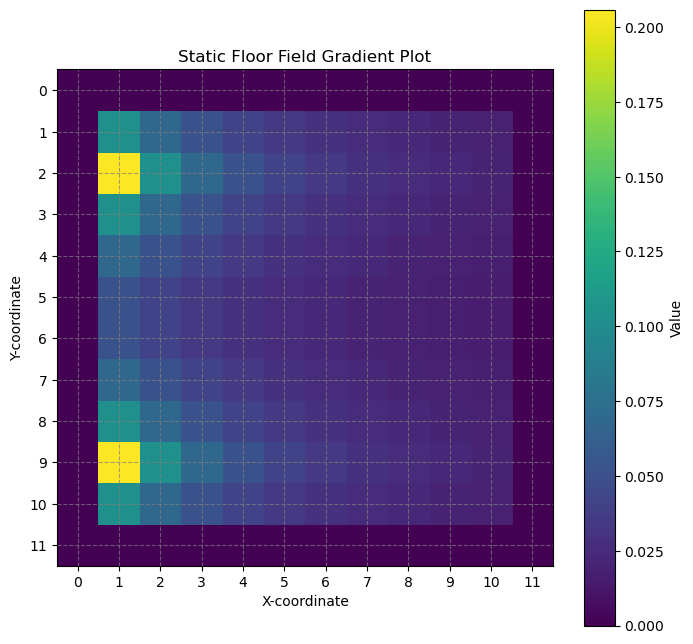

In [6]:
# Function to calculate the shortest distance to the exits
def calculate_shortest_distances(building):
    # List of exit coordinates (left and right doors)
    exits = [(2, 0), (9, 0)]
    distances = [[math.inf for _ in range(12)] for _ in range(12)]
    for exit_x, exit_y in exits:
        queue = [(exit_x, exit_y, 0)]
        visited = set([(exit_x, exit_y)])

        while queue:
            x, y, dist = queue.pop(0)
            distances[x][y] = min(distances[x][y], dist)

            neighbors = [(x + dx, y + dy) for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]]
            for nx, ny in neighbors:
                if 0 <= nx < 12 and 0 <= ny < 12 and building[nx][ny] != 1 and (nx, ny) not in visited:
                    queue.append((nx, ny, dist + 1))
                    visited.add((nx, ny))
    return distances


# Function to calculate the static floor field (S_{ij})
def calculate_static_floor_field(distances):
    total_sum_distances = sum(sum(distance for distance in row if distance != 0 and distance != math.inf) for row in distances)
    total_cells = sum(sum(1 for cell in row if cell != 1) for row in distances)
    static_floor_field = [[(1 / distance) / (total_sum_distances / total_cells) if distance != 0 and distance != math.inf else 0 for distance in row] for row in distances]
    return static_floor_field

distances = calculate_shortest_distances(building)
static_floor_field = calculate_static_floor_field(distances)

# Print the static floor field matrix with 3 decimal places
for row in static_floor_field:
    formatted_row = ["{:.3f}".format(value) for value in row]
    print(formatted_row)
    
# Convert static_floor_field to a NumPy array
static_floor_field_np = np.array(static_floor_field)

# Create a gradient plot (heatmap)
plt.figure(figsize=(8, 8))
plt.imshow(static_floor_field_np, cmap='viridis', interpolation='nearest', origin='upper')
plt.colorbar(label='Value')
plt.title('Static Floor Field Gradient Plot')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.xticks(range(12))
plt.yticks(range(12))
plt.grid(visible=True, linestyle='--', color='gray', alpha=0.7)

# Show the plot
plt.show()

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.04410047 0.02283371 0.01617478 0.0132772  0.01204352
  0.01189057 0.01279066 0.01524933 0.02116727 0.04044551 0.        ]
 [0.         0.02283371 0.01182261 0.00837491 0.00687471 0.00623602
  0.00615691 0.00662304 0.00789621 0.01096062 0.02094315 0.        ]
 [0.         0.01617478 0.00837491 0.00593274 0.0048701  0.00441774
  0.00436178 0.00469208 0.00559412 0.00776519 0.0148375  0.        ]
 [0.         0.0132772  0.00687471 0.0048701  0.0039979  0.00362664
  0.00358078 0.00385201 0.00459261 0.00637506 0.01218134 0.        ]
 [0.         0.01204352 0.00623602 0.00441774 0.00362664 0.00328995
  0.00324842 0.00349454 0.00416646 0.00578357 0.0110512  0.        ]
 [0.         0.01189057 0.00615691 0.00436178 0.00358078 0.00324842
  0.00320747 0.00345055 0.00411407 0.00571089 0.01091238 0.        ]
 [0.         0.01279066 0.00662304 0.00469208 0.0

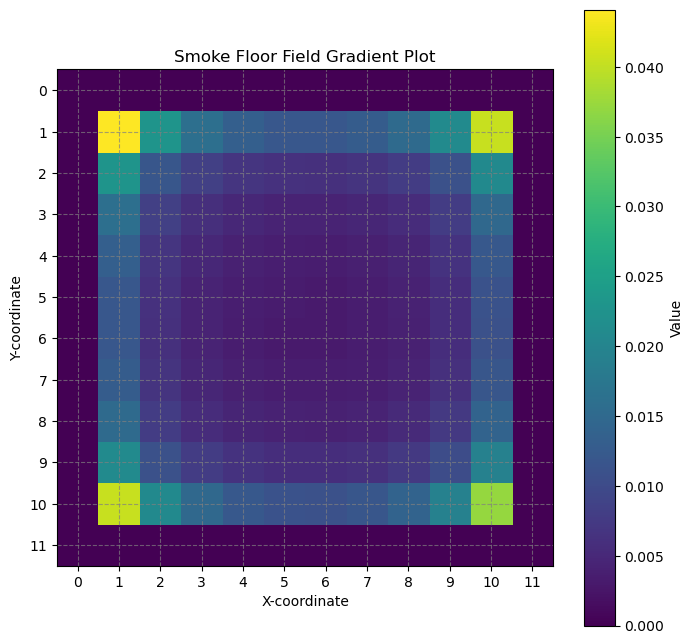

In [9]:
def calculate_smoke_floor_matrix(C):
    smoke_matrix = np.zeros((12, 12))

    for i in range(12):
        for j in range(12):
            distance = C[i, j]  # Use the smoke concentration value from the diffusion simulation
            smoke_matrix[i][j] = 1 / distance if distance > 0 else 0

    normalization_factor = np.sum(smoke_matrix)
    if normalization_factor > 0:
        smoke_floor_matrix = smoke_matrix / normalization_factor
    else:
        smoke_floor_matrix = smoke_matrix

    return smoke_floor_matrix

# Calculate the smoke floor matrix based on the diffusion simulation results (C matrix)
smoke_floor_matrix = calculate_smoke_floor_matrix(C)

# Print the smoke floor matrix
print(smoke_floor_matrix)

# Create a gradient plot (heatmap)
plt.figure(figsize=(8, 8))
plt.imshow(smoke_floor_matrix, cmap='viridis', interpolation='nearest', origin='upper')
plt.colorbar(label='Value')
plt.title('Smoke Floor Field Gradient Plot')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.xticks(range(12))
plt.yticks(range(12))
plt.grid(visible=True, linestyle='--', color='gray', alpha=0.7)

# Show the plot
plt.show()

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.04410047 0.02283371 0.01617478 0.0132772  0.01204352
  0.01189057 0.01279066 0.01524933 0.02116727 0.04044551 0.        ]
 [0.         0.02283371 0.01182261 0.00837491 0.00687471 0.00623602
  0.00615691 0.00662304 0.00789621 0.01096062 0.02094315 0.        ]
 [0.         0.01617478 0.00837491 0.00593274 0.0048701  0.00441774
  0.00436178 0.00469208 0.00559412 0.00776519 0.0148375  0.        ]
 [0.         0.0132772  0.00687471 0.0048701  0.0039979  0.00362664
  0.00358078 0.00385201 0.00459261 0.00637506 0.01218134 0.        ]
 [0.         0.01204352 0.00623602 0.00441774 0.00362664 0.00328995
  0.00324842 0.00349454 0.00416646 0.00578357 0.0110512  0.        ]
 [0.         0.01189057 0.00615691 0.00436178 0.00358078 0.00324842
  0.00320747 0.00345055 0.00411407 0.00571089 0.01091238 0.        ]
 [0.         0.01279066 0.00662304 0.00469208 0.0

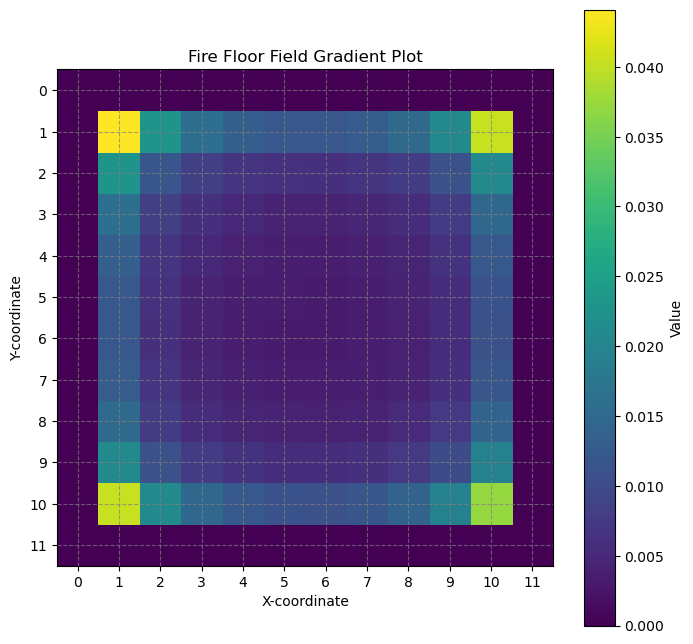

In [10]:
def calculate_fire_floor_matrix(F):
    fire_matrix = np.zeros((12, 12))

    for i in range(12):
        for j in range(12):
            distance = F[i, j]
            fire_matrix[i][j] = 1 / distance if distance > 0 else 0

    normalization_factor = np.sum(fire_matrix)
    if normalization_factor > 0:
        fire_floor_matrix = fire_matrix / normalization_factor
    else:
        fire_floor_matrix = fire_matrix

    return fire_floor_matrix

# Calculate the fire floor matrix based on the diffusion simulation results
fire_floor_matrix = calculate_fire_floor_matrix(F)

# Print the fire floor matrix
print(fire_floor_matrix)

# Create a gradient plot (heatmap)
plt.figure(figsize=(8, 8))
plt.imshow(fire_floor_matrix, cmap='viridis', interpolation='nearest', origin='upper')
plt.colorbar(label='Value')
plt.title('Fire Floor Field Gradient Plot')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.xticks(range(12))
plt.yticks(range(12))
plt.grid(visible=True, linestyle='--', color='gray', alpha=0.7)

# Show the plot
plt.show()

[27.982256146422827, 0, 16.727897700076614, 0, 14.091619543643342, 13.417783476374654, 12.933637423430662, 12.569189467867542, 0, 0]
[0, 0, 19.8573741362791, 16.72789770007661, 15.09221874187191, 14.091619543643342, 13.417783476374655, 0, 12.569189467867544, 0]
[0, 19.8573741362791, 16.727897700076607, 0, 14.091619543643342, 0, 0, 0, 12.28503917041859, 12.057337153443395]
[0, 0, 15.09221874187191, 0, 13.417783476374655, 0, 12.569189467867542, 12.28503917041859, 0, 11.87081275382749]
[16.72789770007661, 15.09221874187191, 14.091619543643342, 13.417783476374655, 0, 12.569189467867544, 12.28503917041859, 12.057337153443395, 11.87081275382749, 0]
[16.72789770007661, 15.09221874187191, 14.091619543643342, 0, 0, 0, 12.28503917041859, 12.057337153443395, 11.87081275382749, 0]
[0, 16.72789770007661, 0, 14.091619543643342, 13.417783476374655, 12.933637423430662, 12.569189467867542, 12.28503917041859, 0, 0]
[27.982256146422834, 0, 16.72789770007661, 15.09221874187191, 14.091619543643342, 13.4177

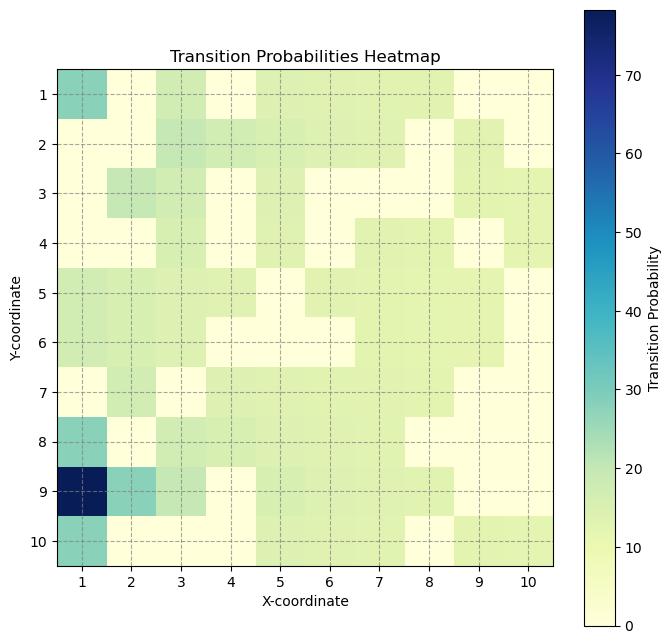

In [11]:
k_sin = 10
k_din = 10
k_hin = 10
k_fin = 10
k_min = 10

a = 0
b = 0
c = 0
d = 0
e = 0

D = 0.1 # Replace with your desired value
alpha = 0.05

def calculate_distance_to_fire(i, j, fire_floor_matrix, F):
    min_distance = math.inf  # Initialize with positive infinity

    for x in range(1, 11):  # Iterate from 1 to 10 (interior range)
        for y in range(1, 11):  # Iterate from 1 to 10 (interior range)
            if fire_floor_matrix[x][y] > 0:
                # Calculate Euclidean distance between (i, j) and (x, y)
                distance = math.sqrt((i - x) ** 2 + (j - y) ** 2)

                # Check if F[x][y] is zero to prevent division by zero
                if F[x][y] == 0:
                    adjusted_distance = math.inf  # Set to a large value when F[x][y] is zero
                else:
                    adjusted_distance = distance / F[x][y]

                min_distance = min(min_distance, adjusted_distance)

    return min_distance

def calculate_transition_probabilities(static_floor_field, fire_floor_matrix, smoke_floor_matrix, building, distances):
    if len(static_floor_field) != len(fire_floor_matrix) != len(smoke_floor_matrix) != len(building) != len(distances) != 12:
        raise ValueError("Input matrices must have a size of 12x12 to match the building size.")

    N = 1  # Placeholder for normalization factor, you can calculate it later
    transition_probabilities = []

    for i in range(1, 11):  # Iterate from 1 to 10 (interior range)
        row_probs = []
        for j in range(1, 11):  # Iterate from 1 to 10 (interior range)
            if building[i][j] == 0:  # Check if the cell is not occupied by a pedestrian
                # Use the calculated distances for panic_ij
                min_distance_em = distances[i][j]  # Use the distance to the nearest exit directly
                panic_ij = D * (1 - math.exp(-alpha * calculate_distance_to_fire(i, j, fire_floor_matrix, F)))

                # Update weights based on panic
                k_S = k_sin + a *  panic_ij
                k_D = k_din + b *  panic_ij
                k_H = k_hin + c *  panic_ij
                k_F = k_fin + d *  panic_ij
                k_M = k_min + e *  panic_ij

                # Calculate the transition probability
                transition_prob = (
                    10
                    * math.exp(k_S * static_floor_field[i][j]
                               + k_F * fire_floor_matrix[i][j] - k_M * smoke_floor_matrix[i][j])
                    * (1 if building[i][j] != 2 else 0)  # (1 - \eta_{ij})
                    * (1 if building[i][j] != 1 else 0)  # \varepsilon_{ij}
                )
                row_probs.append(transition_prob)
            else:
                row_probs.append(0)  # Cell is occupied, no transition possible
        transition_probabilities.append(row_probs)

    return transition_probabilities

# Call the function with the appropriate input data
transition_probabilities = calculate_transition_probabilities(static_floor_field, fire_floor_matrix, smoke_floor_matrix, building, distances)

# Print the transition probabilities
for row in transition_probabilities:
    print(row)

# Convert transition_probabilities to a NumPy array
transition_probabilities_np = np.array(transition_probabilities)

# Create a heatmap
plt.figure(figsize=(8, 8))
plt.imshow(transition_probabilities_np, cmap='YlGnBu', interpolation='nearest', origin='upper')
plt.colorbar(label='Transition Probability')
plt.title('Transition Probabilities Heatmap')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.xticks(range(10), range(1, 11))
plt.yticks(range(10), range(1, 11))
plt.grid(visible=True, linestyle='--', color='gray', alpha=0.7)

# Show the plot
plt.show()


In [12]:
# Working Properly


def simulate_movement(building, transition_probabilities, num_steps, pedestrians, doors):
    for step in range(num_steps):
        print(f"Time Step {step + 1}:")
        new_building = [[cell for cell in row] for row in building]
        updated_positions = []  # Create an empty list to store updated positions

        for i, j in pedestrians:
            if building[i - 1][j - 1] == 2:
                probabilities = transition_probabilities[i - 1][j - 1]  # Adjust for zero-based indexing

                # Create a list of neighboring cells
                neighbors = [(i, j + 1), (i, j - 1), (i + 1, j), (i - 1, j)]
                
                max_prob = -1  # Initialize the maximum probability
                new_i, new_j = 0, 0  # Initialize the new position

                for neighbor_i, neighbor_j in neighbors:
                    if 1 <= neighbor_i <= len(building) and 1 <= neighbor_j <= len(building[0]):
                        neighbor_prob = transition_probabilities[neighbor_i - 1][neighbor_j - 1]
                        if neighbor_prob > max_prob:
                            max_prob = neighbor_prob
                            new_i, new_j = neighbor_i - i, neighbor_j - j

                new_position_i = i + new_i
                new_position_j = j + new_j

                if max_prob > 0:
                    new_building[i - 1][j - 1] = 0  # Adjust for zero-based indexing
                    new_building[new_position_i - 1][new_position_j - 1] = 2  # Adjust for zero-based indexing
                    updated_positions.append((new_position_i, new_position_j))  # Store updated position

        pedestrians = updated_positions  # Update pedestrian positions

        for row in new_building:
            print(row)
        print("\n")

        building = new_building

# Call the simulate_movement function with the building, pedestrian positions, and door positions:
doors = [(2, 0), (9, 0)]  # Define the positions of the doors

# Expand the transition_probabilities to match the building dimensions (12x12)
transition_probabilities_expanded = [[0 for _ in range(12)] for _ in range(12)]

# Copy the 10x10 transition probabilities to the interior of the 12x12 matrix
for i in range(10):
    for j in range(10):
        transition_probabilities_expanded[i + 1][j + 1] = transition_probabilities[i][j]

# Call the simulate_movement function with the building and pedestrian positions generated by the second set of functions:
num_steps = 2  # Set the number of time steps to 2
simulate_movement(building, transition_probabilities_expanded, num_steps, particle_positions, doors)

Time Step 1:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1]
[0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1]
[1, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 1]
[1, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 1]
[1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1]
[1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1]
[1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1]
[1, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1]
[0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1]
[1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Time Step 2:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1]
[0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 1]
[1, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 1]
[1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1]
[1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1]
[1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1]
[1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 1]
[1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 1]
[0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1]
[1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


